In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
fft = dict(
    total_params=3_238_048_528,
    trainable_params=3_238_048_528,
    params_gib=12.06,
    opt_gib=24.13,
    ema_gib=12.06,
    bytes_in_use_gib=38889432576 / 1024**3,
)
lora = dict(
    total_params=3_288_036_112,
    trainable_params=468_039_440,
    params_gib=7.00,
    opt_gib=3.49,
    ema_gib=0.0,
    bytes_in_use_gib=11302572032 / 1024**3,
)

print(fft)
print(lora)


{'total_params': 3238048528, 'trainable_params': 3238048528, 'params_gib': 12.06, 'opt_gib': 24.13, 'ema_gib': 12.06, 'bytes_in_use_gib': 36.21860647201538}
{'total_params': 3288036112, 'trainable_params': 468039440, 'params_gib': 7.0, 'opt_gib': 3.49, 'ema_gib': 0.0, 'bytes_in_use_gib': 10.52634048461914}


/tmp/ipykernel_10984/1957264236.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=trainable_pct, ax=ax, palette=palette2)


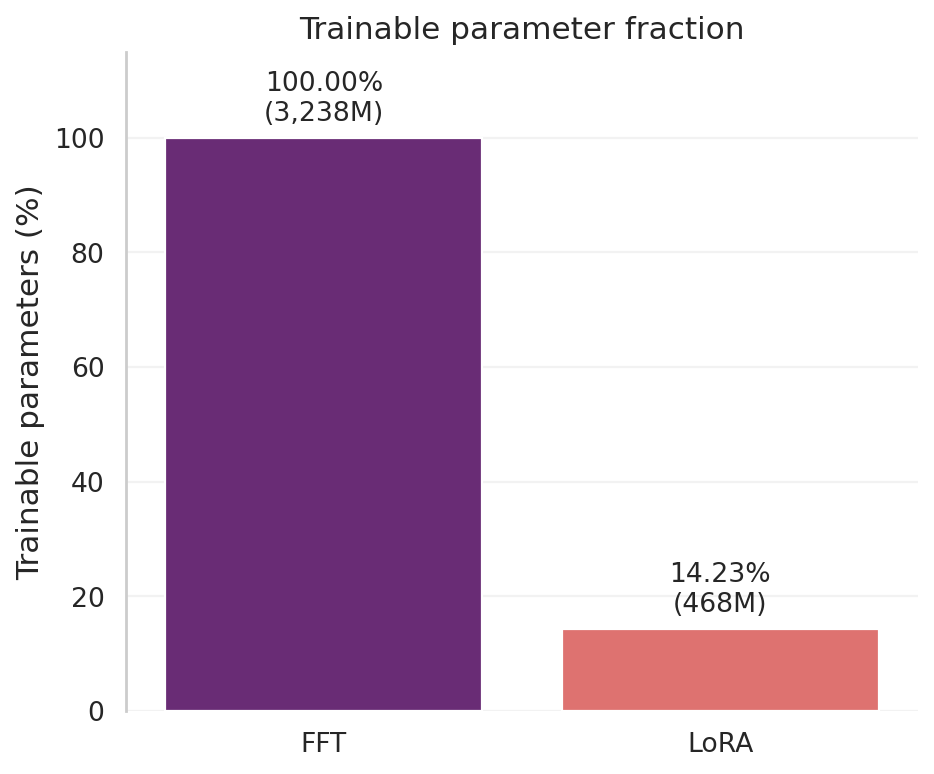

In [11]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({"font.size": 12})

font_size = 12
font_size_large = 14

def pct(trainable, total):
    return 100.0 * trainable / total


# Plot 1: Trainable parameters
labels = ["FFT", "LoRA"]
trainable_pct = [
    pct(fft["trainable_params"], fft["total_params"]),
    pct(lora["trainable_params"], lora["total_params"]),
]
trainable_abs_m = [fft["trainable_params"] / 1e6, lora["trainable_params"] / 1e6]

fig, ax = plt.subplots(figsize=(6, 5), dpi=160)
palette2 = sns.color_palette("magma", 2)

sns.barplot(x=labels, y=trainable_pct, ax=ax, palette=palette2)
ax.set_ylim(0, 115)
ax.set_ylabel("Trainable parameters (%)", fontsize=font_size_large)
ax.set_title("Trainable parameter fraction", fontsize=font_size_large)

for b, m in zip(ax.patches, trainable_abs_m, strict=True):
    ax.text(
        b.get_x() + b.get_width() / 2,
        b.get_height() + 2,
        f"{b.get_height():.2f}%\n({m:,.0f}M)",
        ha="center",
        va="bottom",
        fontsize=font_size,
    )

ax.grid(axis="y", alpha=0.25)
ax.tick_params(axis='x', labelsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
sns.despine(ax=ax, left=False, bottom=True)
plt.tight_layout()

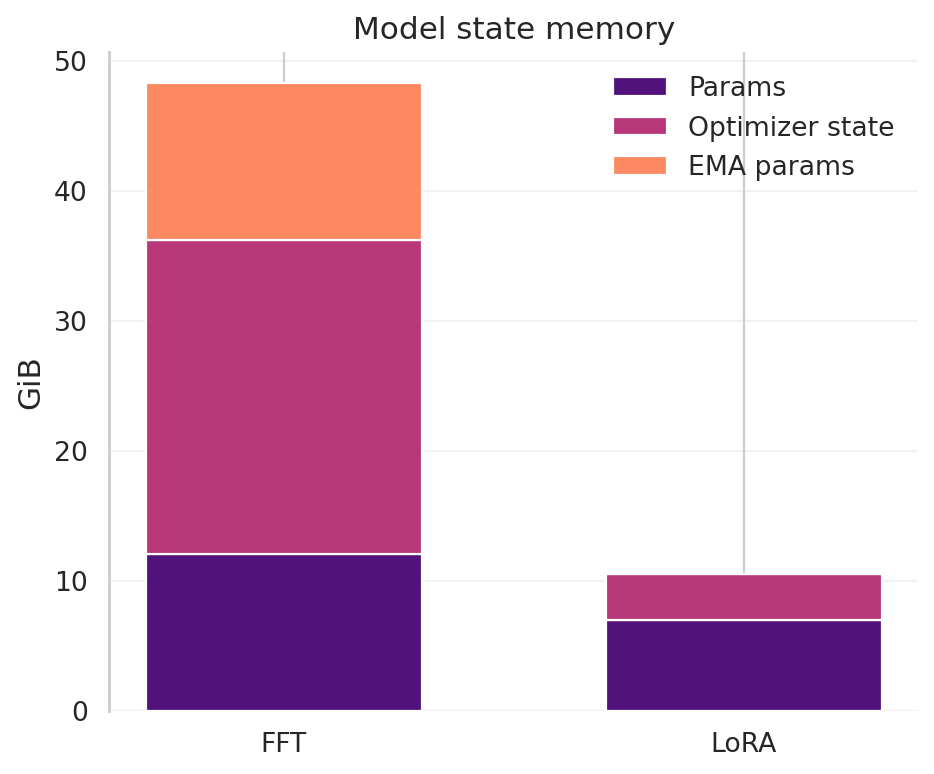

In [12]:
# Plot 2: Memory breakdown
params = [fft["params_gib"], lora["params_gib"]]
opt = [fft["opt_gib"], lora["opt_gib"]]
ema = [fft["ema_gib"], lora["ema_gib"]]
bytes_in_use = [fft["bytes_in_use_gib"], lora["bytes_in_use_gib"]]

x = np.arange(len(labels))
w = 0.6

fig, ax = plt.subplots(figsize=(6, 5), dpi=160)
palette3 = sns.color_palette("magma", 3)

ax.bar(x, params, width=w, label="Params", color=palette3[0])
ax.bar(x, opt, width=w, bottom=params, label="Optimizer state", color=palette3[1])
ax.bar(
    x,
    ema,
    width=w,
    bottom=np.array(params) + np.array(opt),
    label="EMA params",
    color=palette3[2],
)

ax.set_xticks(x, labels)
ax.set_ylabel("GiB", fontsize=font_size_large   )
ax.set_title("Model state memory", fontsize=font_size_large)
ax.grid(axis="y", alpha=0.25)
ax.legend(ncols=1, fontsize=font_size, frameon=False)
ax.tick_params(axis='x', labelsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
sns.despine(ax=ax, left=False, bottom=True)
plt.tight_layout()

plt.show()